In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import loadtxt
import warnings
from scipy import stats
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Column Names
a = ['Unit Number', 'Time In Cycles']
b = [f'Operation Setting {x}' for x in range(1,4)]
c = [f'Sensor {i}' for i in range(1,22)]
Columns = a+b+c

In [152]:
# train dataset
df1 = pd.read_csv('train_FD001.txt', delim_whitespace = True, header = None)
df1.columns = Columns
print(df1.shape)
df1.head()

(20631, 26)


Unit Number  Time In Cycles  Operation Setting 1  Operation Setting 2  \
0            1               1              -0.0007              -0.0004   
1            1               2               0.0019              -0.0003   
2            1               3              -0.0043               0.0003   
3            1               4               0.0007               0.0000   
4            1               5              -0.0019              -0.0002   

   Operation Setting 3  Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5  \
0                100.0    518.67    641.82   1589.70   1400.60     14.62   
1                100.0    518.67    642.15   1591.82   1403.14     14.62   
2                100.0    518.67    642.35   1587.99   1404.20     14.62   
3                100.0    518.67    642.35   1582.79   1401.87     14.62   
4                100.0    518.67    642.37   1582.85   1406.22     14.62   

   Sensor 6  Sensor 7  Sensor 8  Sensor 9  Sensor 10  Sensor 11  Sensor 12  \
0     21.61    554.36   2388.06   9046.19        1.3      47.47     521.66   
1     21.61    553.75   2388.04   9044.07        1.3      47.49     522.28   
2     21.61    554.26   2388.08   9052.94        1.3      47.27     522.42   
3     21.61    554.45   2388.11   9049.48        1.3      47.13     522.86   
4     21.61    554.00   2388.06   9055.15        1.3      47.28     522.19   

   Sensor 13  Sensor 14  Sensor 15  Sensor 16  Sensor 17  Sensor 18  \
0    2388.02    8138.62     8.4195       0.03        392       2388   
1    2388.07    8131.49     8.4318       0.03        392       2388   
2    2388.03    8133.23     8.4178       0.03        390       2388   
3    2388.08    8133.83     8.3682       0.03        392       2388   
4    2388.04    8133.80     8.4294       0.03        393       2388   

   Sensor 19  Sensor 20  Sensor 21  
0      100.0      39.06    23.4190  
1      100.0      39.00    23.4236  
2      100.0      38.95    23.3442  
3      100.0      38.88    23.3739  
4      100.0      38.90    23.4044

In [153]:
# test dataset
df2 = pd.read_csv('test_FD001.txt', delim_whitespace = True, header = None)
df2.columns = Columns
print(df1.shape)
df2.head()

(20631, 26)


Unit Number  Time In Cycles  Operation Setting 1  Operation Setting 2  \
0            1               1               0.0023               0.0003   
1            1               2              -0.0027              -0.0003   
2            1               3               0.0003               0.0001   
3            1               4               0.0042               0.0000   
4            1               5               0.0014               0.0000   

   Operation Setting 3  Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5  \
0                100.0    518.67    643.02   1585.29   1398.21     14.62   
1                100.0    518.67    641.71   1588.45   1395.42     14.62   
2                100.0    518.67    642.46   1586.94   1401.34     14.62   
3                100.0    518.67    642.44   1584.12   1406.42     14.62   
4                100.0    518.67    642.51   1587.19   1401.92     14.62   

   Sensor 6  Sensor 7  Sensor 8  Sensor 9  Sensor 10  Sensor 11  Sensor 12  \
0     21.61    553.90   2388.04   9050.17        1.3      47.20     521.72   
1     21.61    554.85   2388.01   9054.42        1.3      47.50     522.16   
2     21.61    554.11   2388.05   9056.96        1.3      47.50     521.97   
3     21.61    554.07   2388.03   9045.29        1.3      47.28     521.38   
4     21.61    554.16   2388.01   9044.55        1.3      47.31     522.15   

   Sensor 13  Sensor 14  Sensor 15  Sensor 16  Sensor 17  Sensor 18  \
0    2388.03    8125.55     8.4052       0.03        392       2388   
1    2388.06    8139.62     8.3803       0.03        393       2388   
2    2388.03    8130.10     8.4441       0.03        393       2388   
3    2388.05    8132.90     8.3917       0.03        391       2388   
4    2388.03    8129.54     8.4031       0.03        390       2388   

   Sensor 19  Sensor 20  Sensor 21  
0      100.0      38.86    23.3735  
1      100.0      39.02    23.3916  
2      100.0      39.08    23.4166  
3      100.0      39.00    23.3737  
4      100.0      38.99    23.4130

In [154]:
pd.set_option('display.max_columns', None)
df1.describe(include = 'all')

Unit Number  Time In Cycles  Operation Setting 1  Operation Setting 2  \
count  20631.000000    20631.000000         20631.000000         20631.000000   
mean      51.506568      108.807862            -0.000009             0.000002   
std       29.227633       68.880990             0.002187             0.000293   
min        1.000000        1.000000            -0.008700            -0.000600   
25%       26.000000       52.000000            -0.001500            -0.000200   
50%       52.000000      104.000000             0.000000             0.000000   
75%       77.000000      156.000000             0.001500             0.000300   
max      100.000000      362.000000             0.008700             0.000600   

       Operation Setting 3      Sensor 1      Sensor 2      Sensor 3  \
count              20631.0  2.063100e+04  20631.000000  20631.000000   
mean                 100.0  5.186700e+02    642.680934   1590.523119   
std                    0.0  6.537152e-11      0.500053      6.131150   
min                  100.0  5.186700e+02    641.210000   1571.040000   
25%                  100.0  5.186700e+02    642.325000   1586.260000   
50%                  100.0  5.186700e+02    642.640000   1590.100000   
75%                  100.0  5.186700e+02    643.000000   1594.380000   
max                  100.0  5.186700e+02    644.530000   1616.910000   

           Sensor 4      Sensor 5      Sensor 6      Sensor 7      Sensor 8  \
count  20631.000000  2.063100e+04  20631.000000  20631.000000  20631.000000   
mean    1408.933782  1.462000e+01     21.609803    553.367711   2388.096652   
std        9.000605  3.394700e-12      0.001389      0.885092      0.070985   
min     1382.250000  1.462000e+01     21.600000    549.850000   2387.900000   
25%     1402.360000  1.462000e+01     21.610000    552.810000   2388.050000   
50%     1408.040000  1.462000e+01     21.610000    553.440000   2388.090000   
75%     1414.555000  1.462000e+01     21.610000    554.010000   2388.140000   
max     1441.490000  1.462000e+01     21.610000    556.060000   2388.560000   

           Sensor 9     Sensor 10     Sensor 11     Sensor 12     Sensor 13  \
count  20631.000000  2.063100e+04  20631.000000  20631.000000  20631.000000   
mean    9065.242941  1.300000e+00     47.541168    521.413470   2388.096152   
std       22.082880  4.660829e-13      0.267087      0.737553      0.071919   
min     9021.730000  1.300000e+00     46.850000    518.690000   2387.880000   
25%     9053.100000  1.300000e+00     47.350000    520.960000   2388.040000   
50%     9060.660000  1.300000e+00     47.510000    521.480000   2388.090000   
75%     9069.420000  1.300000e+00     47.700000    521.950000   2388.140000   
max     9244.590000  1.300000e+00     48.530000    523.380000   2388.560000   

          Sensor 14     Sensor 15     Sensor 16     Sensor 17  Sensor 18  \
count  20631.000000  20631.000000  2.063100e+04  20631.000000    20631.0   
mean    8143.752722      8.442146  3.000000e-02    393.210654     2388.0   
std       19.076176      0.037505  1.556432e-14      1.548763        0.0   
min     8099.940000      8.324900  3.000000e-02    388.000000     2388.0   
25%     8133.245000      8.414900  3.000000e-02    392.000000     2388.0   
50%     8140.540000      8.438900  3.000000e-02    393.000000     2388.0   
75%     8148.310000      8.465600  3.000000e-02    394.000000     2388.0   
max     8293.720000      8.584800  3.000000e-02    400.000000     2388.0   

       Sensor 19     Sensor 20     Sensor 21  
count    20631.0  20631.000000  20631.000000  
mean       100.0     38.816271     23.289705  
std          0.0      0.180746      0.108251  
min        100.0     38.140000     22.894200  
25%        100.0     38.700000     23.221800  
50%        100.0     38.830000     23.297900  
75%        100.0     38.950000     23.366800  
max        100.0     39.430000     23.618400

In [155]:
df1.isnull().sum()

Unit Number            0
Time In Cycles         0
Operation Setting 1    0
Operation Setting 2    0
Operation Setting 3    0
                      ..
Sensor 17              0
Sensor 18              0
Sensor 19              0
Sensor 20              0
Sensor 21              0
Length: 26, dtype: int64

In [156]:
df2.isnull().sum()

Unit Number            0
Time In Cycles         0
Operation Setting 1    0
Operation Setting 2    0
Operation Setting 3    0
                      ..
Sensor 17              0
Sensor 18              0
Sensor 19              0
Sensor 20              0
Sensor 21              0
Length: 26, dtype: int64

In [157]:
# Life of all 100 units of train set

pd.set_option('display.max_rows', None)
print(df1.groupby('Unit Number')['Time In Cycles'].max())
pd.set_option('display.max_rows', 15)

Unit Number
1      192
2      287
3      179
4      189
5      269
6      188
7      259
8      150
9      201
10     222
11     240
12     170
13     163
14     180
15     207
16     209
17     276
18     195
19     158
20     234
21     195
22     202
23     168
24     147
25     230
26     199
27     156
28     165
29     163
30     194
31     234
32     191
33     200
34     195
35     181
36     158
37     170
38     194
39     128
40     188
41     216
42     196
43     207
44     192
45     158
46     256
47     214
48     231
49     215
50     198
51     213
52     213
53     195
54     257
55     193
56     275
57     137
58     147
59     231
60     172
61     185
62     180
63     174
64     283
65     153
66     202
67     313
68     199
69     362
70     137
71     208
72     213
73     213
74     166
75     229
76     210
77     154
78     231
79     199
80     185
81     240
82     214
83     293
84     267
85     188
86     278
87     178
88     213
89     217
90     15

# Adding the dependent variable RUL

In [158]:
# Dependent variable for TRAIN set

# list of Life of all 100 units of train set
max_cycle_df1 = df1.groupby('Unit Number')['Time In Cycles'].max()

'''
The purpose of this code is to make our dependent variable

Line1 : Declare an empty list
Line2 : for loop for going through the maximum cycles of each unit
Line3 : for loop for iterating through each row of the dataset
Line4 : if statement for checking equality to match each unit's max. cycle with it's unit
Line5 : adding value of RUL for that unit to the empty list for that instance
Line6 : else if statement to break the inner for loop if inner for loop has moved on to the next unit
'''
RUL = []
for index,rul in enumerate(max_cycle_df1):
    for i in range(df1.shape[0]):
        if df1.iloc[i,0] == (index+1):
            RUL.append(rul-df1.iloc[i,1])
        elif df1.iloc[i,0] == (index+2):
            break
df1['RUL'] = RUL            

In [160]:
# Dependent variable for TEST set

'''
The file 'RUL_FD001.text' provides the RUL of the unit for the last available record.
So we run the first for loop to calculate the maxcycles each unit will run
'''
max_cycle_df2 = []
rul_fd001 = loadtxt('RUL_FD001.txt', unpack = False, dtype = int)
for index,i in enumerate(df2['Unit Number'].unique()):
    max_cycle_df2.append(rul_fd001[index] + df2[df2['Unit Number'] == i].iloc[-1,1])
    
    
RUL = []
for index,rul in enumerate(max_cycle_df2):
    for i in range(df2.shape[0]):
        if df2.iloc[i,0] == (index+1):
            RUL.append(rul-df2.iloc[i,1])
        elif df2.iloc[i,0] == (index+2):
            break
df2['RUL'] = RUL            

# Data Visualisation

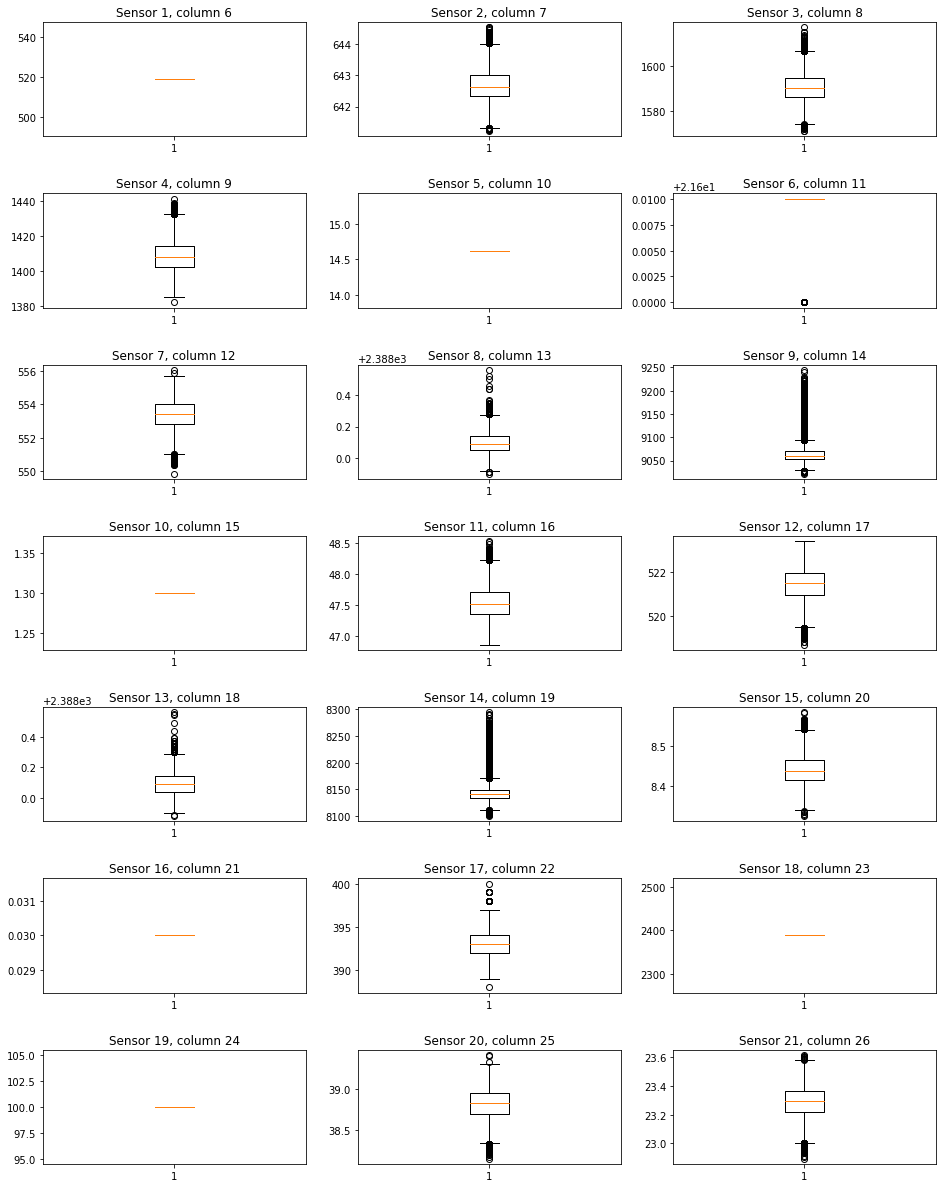

In [161]:
plt.figure(figsize = (16, 21))

for i in range(21):
    temp_data = df1.iloc[:,i+5]
    plt.subplot(7,3,i+1)
    plt.boxplot(temp_data)
    plt.title(df1.columns[i+5] + ", column "+ str(i+6))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [162]:

warnings.filterwarnings("ignore")

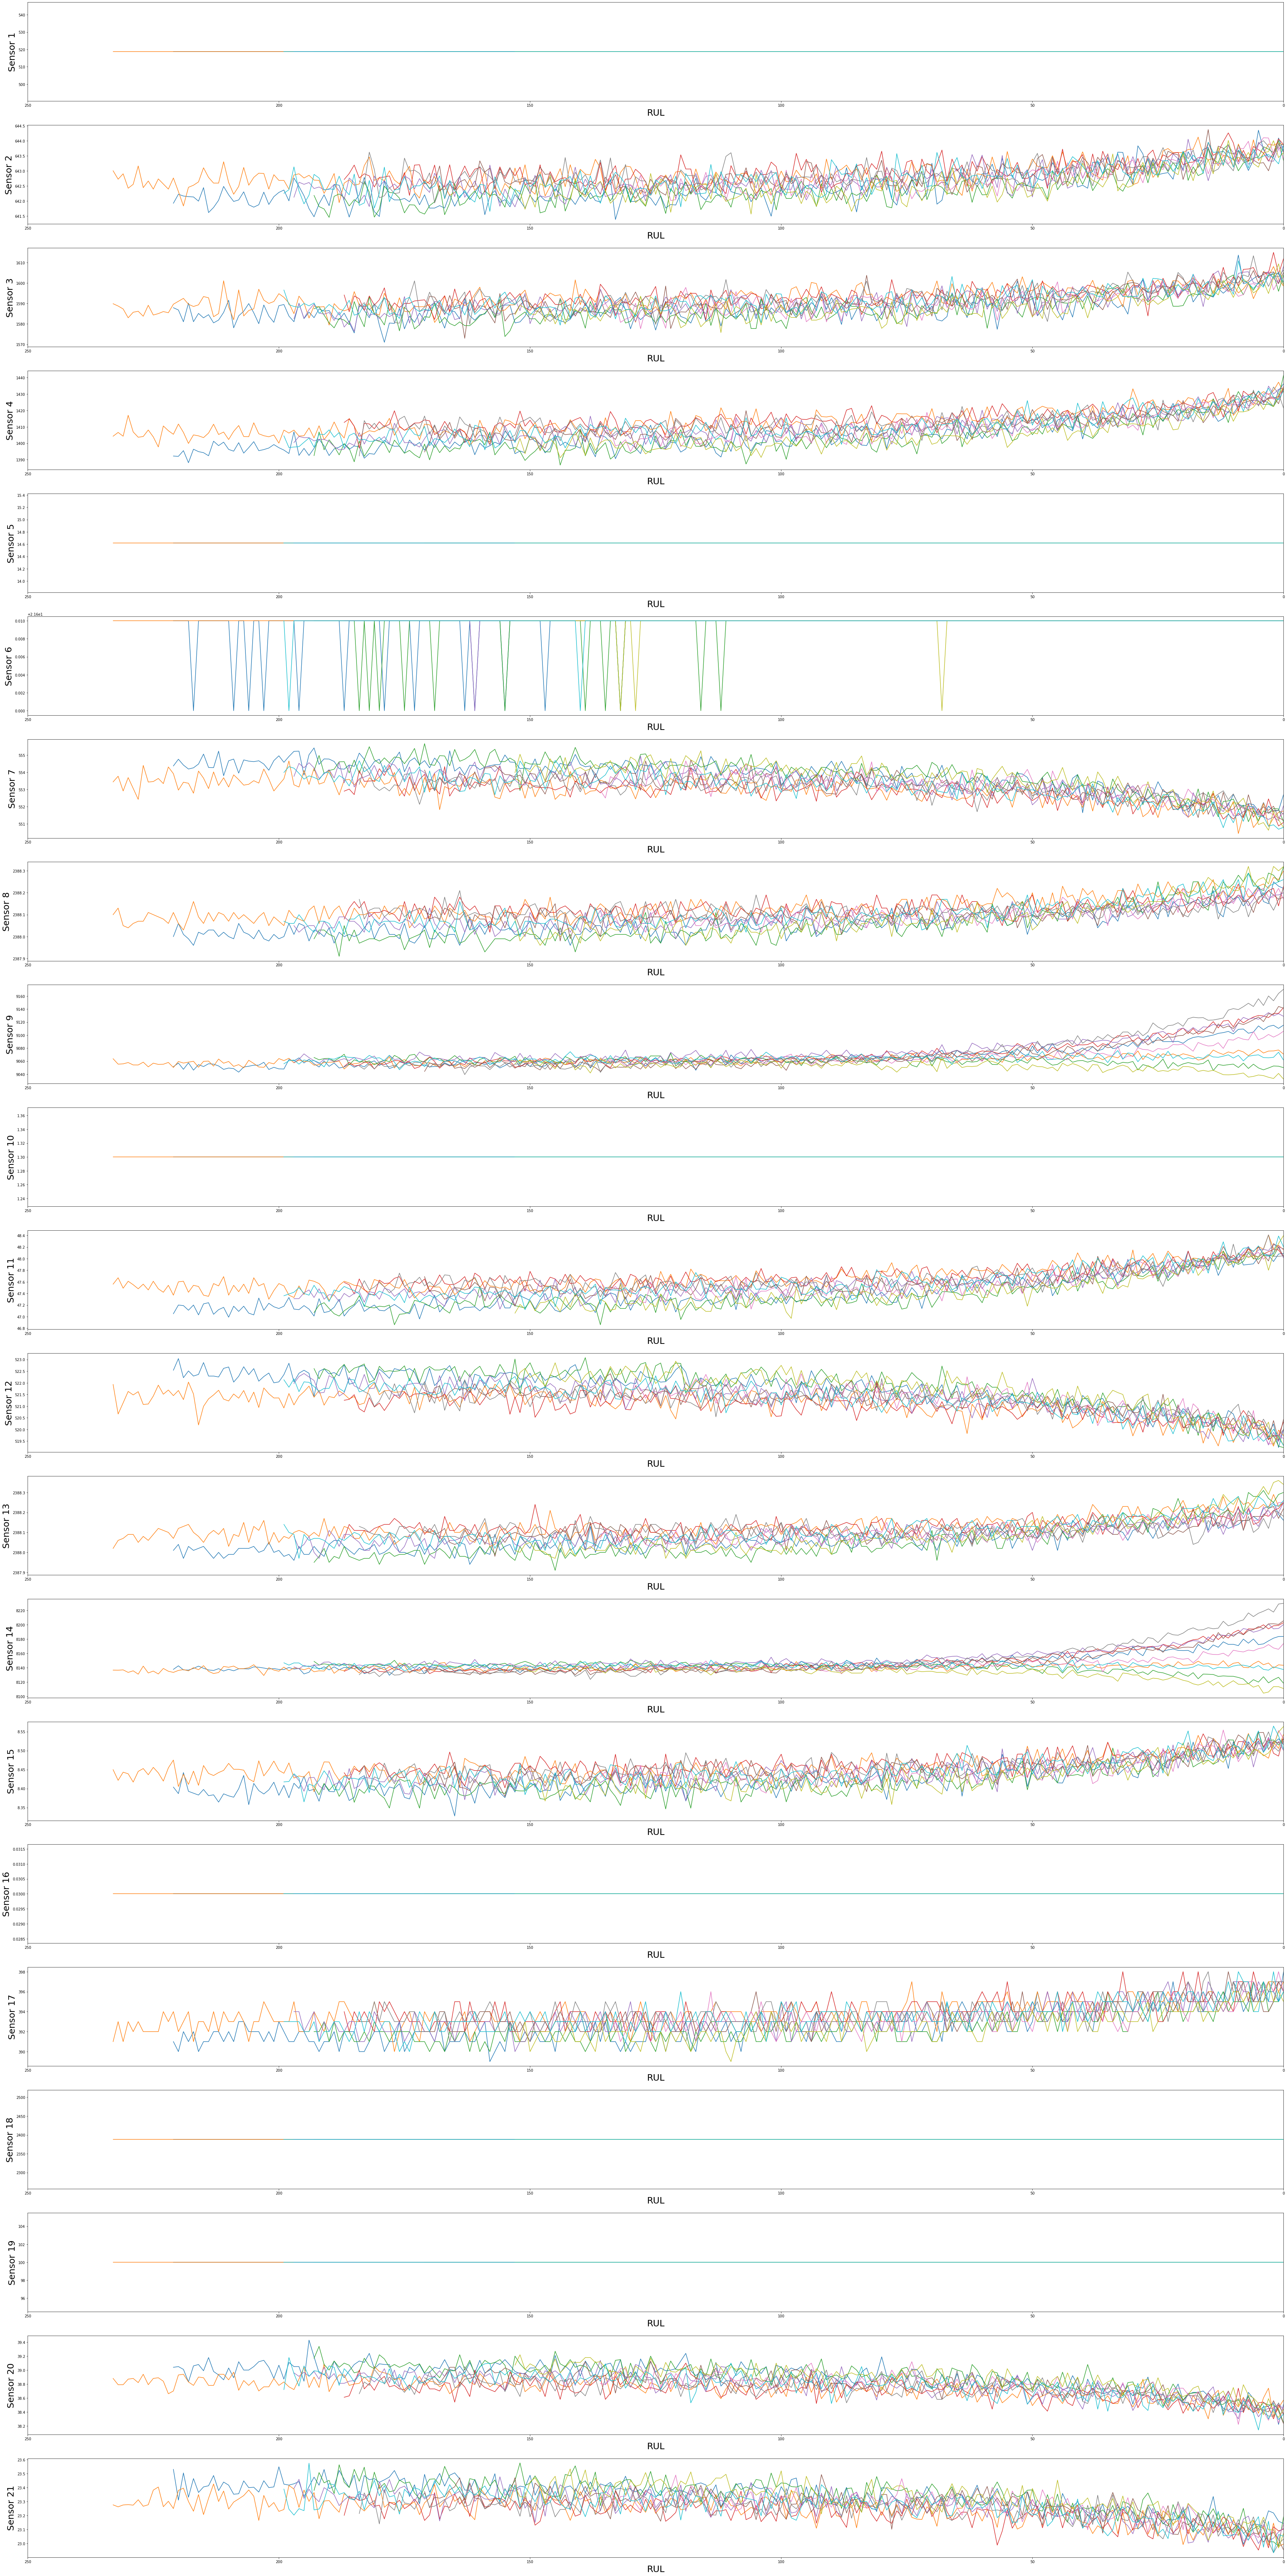

In [97]:
'''
The goal of this cell is to display the values of sensors against the value of RUL(x-axis, decreasing)
'''

plt.figure(figsize= (50,100))

for i in df1['Unit Number'].unique():
    if i%10 == 0:
        temp = df1[df1['Unit Number'] == i]
        for i in range(21):
            plt.subplot(21,1,i+1)
            plt.plot(temp['RUL'],temp.iloc[:,i+5])
            plt.xlim(250,0)
            plt.xlabel('RUL', fontsize = 25)
            plt.ylabel(temp.columns[i+5], fontsize = 25)

plt.tight_layout()

Based on above plots you can see that sensor 1,5,6,10,16,18 & 19 have constant values. So they will be dropped

Also sensor 9 and 14 can also be dropped due to their spread

# Exploratory analysis for Dependent variable RUL

In [165]:
# for df1
print(stats.describe(max_cycle_df1))
print(f'\nThe standard deviation of this list is {np.std(max_cycle_df1)}')



DescribeResult(nobs=100, minmax=(128, 362), mean=206.31, variance=2147.6504040404043, skewness=1.0159342583415127, kurtosis=1.113867529578351)

The standard deviation of this list is 46.11045326170628


In [166]:
# Based on the information provided above let's see the spread of Life of Units 

ct=0
for i in max_cycle_df1:
    if i > 300:
        ct+=1
print(f'The Number of Units with a life of more than 300: {ct}')


ct=0
for i in max_cycle_df1:
    if i > 250:
        ct+=1
print(f'The Number of Units with a life of more than 250: {ct}')

The Number of Units with a life of more than 300: 4
The Number of Units with a life of more than 250: 17


In [167]:
#for df2
print(stats.describe(max_cycle_df2))
print(f'\nThe standard deviation of this list is {np.std(max_cycle_df2)}')



DescribeResult(nobs=100, minmax=(141, 341), mean=206.48, variance=1939.6864646464646, skewness=0.8605407439287637, kurtosis=0.5179164434468806)

The standard deviation of this list is 43.821109068575616


In [168]:
# Based on the information provided above let's see the spread of Life of Units 
ct=0
for i in max_cycle_df2:
    if i > 300:
        ct+=1
print(f'The Number of Units with a life of more than 300: {ct}')


ct=0
for i in max_cycle_df2:
    if i > 250:
        ct+=1
print(f'The Number of Units with a life of more than 250: {ct}')

The Number of Units with a life of more than 300: 4
The Number of Units with a life of more than 250: 17


In [144]:
unit = []
for i in range(df1.shape[0]):
    if (df1.loc[i,'Time In Cycles'] == 1) & (df1.loc[i,'RUL'] >250 ):
        
        unit.append(int(df1.loc[i, ['Unit Number']]))
        
df1 = df1[df1['Unit Number'].isin(unit) == False]    
df1.reset_index(drop = True, inplace = True)

In [130]:
unit

[2, 5, 7, 17, 46, 54, 56, 64, 67, 69, 83, 84, 86, 92, 94, 95, 96]

# Dropping Features

In [145]:
df1.drop(['Operation Setting 1','Operation Setting 2','Operation Setting 3',
          'Sensor 1','Sensor 5','Sensor 6','Sensor 16','Sensor 10','Sensor 18','Sensor 19', 'Time In Cycles'], axis = 1, inplace = True)

In [146]:
df2.drop(['Operation Setting 1','Operation Setting 2','Operation Setting 3',
          'Sensor 1','Sensor 5','Sensor 6','Sensor 16','Sensor 10','Sensor 18','Sensor 19', 'Time In Cycles'], axis = 1, inplace = True)

# Splitting Test Data 

In [147]:
df2['Unit Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [148]:
df1[df1['Unit Number'] == 2]

Empty DataFrame
Columns: [Unit Number, Sensor 2, Sensor 3, Sensor 4, Sensor 7, Sensor 8, Sensor 9, Sensor 11, Sensor 12, Sensor 13, Sensor 14, Sensor 15, Sensor 17, Sensor 20, Sensor 21, RUL]
Index: []

In [149]:
#df1 will be our train set

x_train = df1.iloc[:,:-1]
y_train = df1.iloc[:,-1]

In [150]:
# The test set will have the reading for the first 75 units 
test = df2[df2['Unit Number']<=75]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

# The validation set will have the reading for the remaining 25 units
valid = df2[df2['Unit Number'] >75]
x_valid = valid.iloc[:,:-1]
y_valid = valid.iloc[:,-1]
for i in (x_valid, y_valid):
    i.reset_index(inplace =True, drop = True)

In [115]:
print(f"The number of rows and columns for the train set={x_train.shape}, these rows are the reading for 100 units")
print(f"The number of rows and columns for the test set={x_test.shape}, these rows are the reading for 75 units")
print(f"The number of rows and columns for the valididation set={x_valid.shape}, these rows are the reading for 25 units")
x_test.head()

The number of rows and columns for the train set=(20631, 15), these rows are the reading for 100 units
The number of rows and columns for the test set=(9715, 15), these rows are the reading for 75 units
The number of rows and columns for the valididation set=(3381, 15), these rows are the reading for 25 units


Unit Number  Sensor 2  Sensor 3  Sensor 4  Sensor 7  Sensor 8  Sensor 9  \
0            1    643.02   1585.29   1398.21    553.90   2388.04   9050.17   
1            1    641.71   1588.45   1395.42    554.85   2388.01   9054.42   
2            1    642.46   1586.94   1401.34    554.11   2388.05   9056.96   
3            1    642.44   1584.12   1406.42    554.07   2388.03   9045.29   
4            1    642.51   1587.19   1401.92    554.16   2388.01   9044.55   

   Sensor 11  Sensor 12  Sensor 13  Sensor 14  Sensor 15  Sensor 17  \
0      47.20     521.72    2388.03    8125.55     8.4052        392   
1      47.50     522.16    2388.06    8139.62     8.3803        393   
2      47.50     521.97    2388.03    8130.10     8.4441        393   
3      47.28     521.38    2388.05    8132.90     8.3917        391   
4      47.31     522.15    2388.03    8129.54     8.4031        390   

   Sensor 20  Sensor 21  
0      38.86    23.3735  
1      39.02    23.3916  
2      39.08    23.4166  
3      39.00    23.3737  
4      38.99    23.4130

In [116]:
x_valid.columns

Index(['Unit Number', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 7',
       'Sensor 8', 'Sensor 9', 'Sensor 11', 'Sensor 12', 'Sensor 13',
       'Sensor 14', 'Sensor 15', 'Sensor 17', 'Sensor 20', 'Sensor 21'],
      dtype='object')

# Standardising The Data

In [118]:
standardizer = preprocessing.StandardScaler()

standardized_train = standardizer.fit_transform(x_train.drop(['Unit Number'], axis = 1))

xs_train = pd.DataFrame(standardized_train, columns = x_train.drop(['Unit Number'], axis = 1).columns)
xs_train.insert(0,column = 'Unit Number', value = x_train['Unit Number'])

xs_train.head()

Unit Number  Sensor 2  Sensor 3  Sensor 4  Sensor 7  Sensor 8  Sensor 9  \
0            1 -1.721725 -0.134255 -0.925936  1.121141 -0.516338 -0.862813   
1            1 -1.061780  0.211528 -0.643726  0.431930 -0.798093 -0.958818   
2            1 -0.661813 -0.413166 -0.525953  1.008155 -0.234584 -0.557139   
3            1 -0.661813 -1.261314 -0.784831  1.222827  0.188048 -0.713826   
4            1 -0.621816 -1.251528 -0.301518  0.714393 -0.516338 -0.457059   

   Sensor 11  Sensor 12  Sensor 13  Sensor 14  Sensor 15  Sensor 17  \
0  -0.266467   0.334262  -1.058890  -0.269071  -0.603816  -0.781710   
1  -0.191583   1.174899  -0.363646  -0.642845  -0.275852  -0.781710   
2  -1.015303   1.364721  -0.919841  -0.551629  -0.649144  -2.073094   
3  -1.539489   1.961302  -0.224597  -0.520176  -1.971665  -0.781710   
4  -0.977861   1.052871  -0.780793  -0.521748  -0.339845  -0.136018   

   Sensor 20  Sensor 21  
0   1.348493   1.194427  
1   1.016528   1.236922  
2   0.739891   0.503423  
3   0.352598   0.777792  
4   0.463253   1.059552

In [119]:
# standardizing the test set on the parameters of the training set
standardized_test = standardizer.transform(x_test.drop(['Unit Number'], axis = 1))

xs_test = pd.DataFrame(standardized_test, columns = x_test.drop(['Unit Number'], axis = 1).columns)
xs_test.insert(0,column = 'Unit Number', value = x_test['Unit Number'])

# standardizing the validation set on the parameters of the training set
standardized_valid = standardizer.transform(x_valid.drop(['Unit Number'], axis = 1))

xs_valid = pd.DataFrame(standardized_valid, columns = x_valid.drop(['Unit Number'], axis = 1).columns)
xs_valid.insert(0,column = 'Unit Number', value = x_valid['Unit Number'])

In [120]:
xs_train.columns

Index(['Unit Number', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 7',
       'Sensor 8', 'Sensor 9', 'Sensor 11', 'Sensor 12', 'Sensor 13',
       'Sensor 14', 'Sensor 15', 'Sensor 17', 'Sensor 20', 'Sensor 21'],
      dtype='object')

In [121]:
for i in (xs_train,xs_valid):
    i.drop(['Sensor 9', 'Sensor 14'], axis = 1, inplace = True)

In [122]:
for i in (xs_train,xs_valid):
    i.drop(['Sensor 8', 'Sensor 13'], axis = 1, inplace = True)

# Feature Selection

### 1) Trendability

In [123]:
def trendability(col):
    
    trend_vals = []
    temp = xs_train.copy()
    temp['RUL'] = y_train
    
    
    for i in x_train['Unit Number'].unique():
        
        trend_vals.append(temp[['RUL', col]].corr().iloc[0][1])
    
    return np.abs(np.mean(trend_vals))

<AxesSubplot:xlabel='Features'>

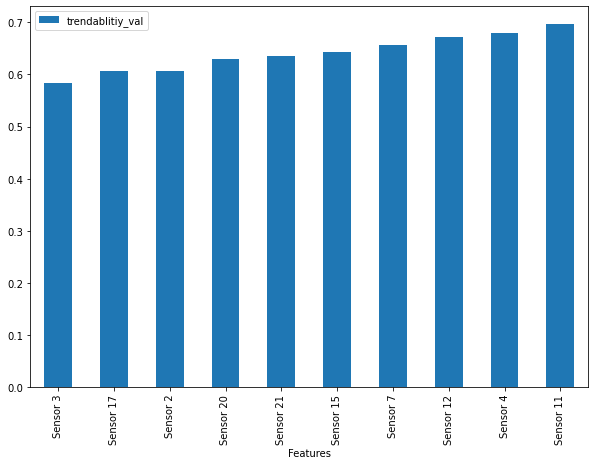

In [124]:
df_trend = pd.DataFrame()

for col in xs_train.drop(['Unit Number'], axis = 1).columns:
    df_trend = df_trend.append({'Features': col, 'trendablitiy_val': trendability(col)}, ignore_index = True)

# making features the index and sorting the values in ascending order for the bar plot    
df_trend.set_index('Features', inplace= True)
df_trend.sort_values(by = 'trendablitiy_val', inplace = True)

df_trend.plot.bar(figsize = (10,7))    

In [125]:
def mlmodel(model):
    model.fit(xs_train, y_train)
    
    y_pred_train = model.predict(xs_train)
    print('The RMSE for the train set: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('The MAE for the train set: ',mean_absolute_error(y_train,y_pred_train))
    
    y_pred_valid = model.predict(xs_valid)
    print('The RMSE for the validation set: ',np.sqrt(mean_squared_error(y_valid, y_pred_valid)))
    print('The MAE for the validation set: ',mean_absolute_error(y_valid, y_pred_valid))
    
    print('The values for hyperparameters were:  ', model.get_params())
    
    plt.figure(figsize = (10,15))
    
    plt.subplot(2,1,1)
    plt.plot(y_train, label = 'actual')
    plt.plot(y_pred_train, label = 'predicted', alpha  = .8)
    plt.title('Train Set')
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(y_valid, label = 'actual')
    plt.plot(y_pred_valid, label = 'predicted', alpha  = .8)
    plt.title('Validation Set')
    plt.legend()


# Linear Regression Model

In [126]:
for i in (xs_train, xs_test, xs_valid):
    i.drop(['Unit Number'], axis = 1, inplace = True)

The RMSE for the train set:  46.051269091876215
The MAE for the train set:  35.072407851064035
The RMSE for the validation set:  56.61226083557604
The MAE for the validation set:  41.16090620924127
The values for hyperparameters were:   {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


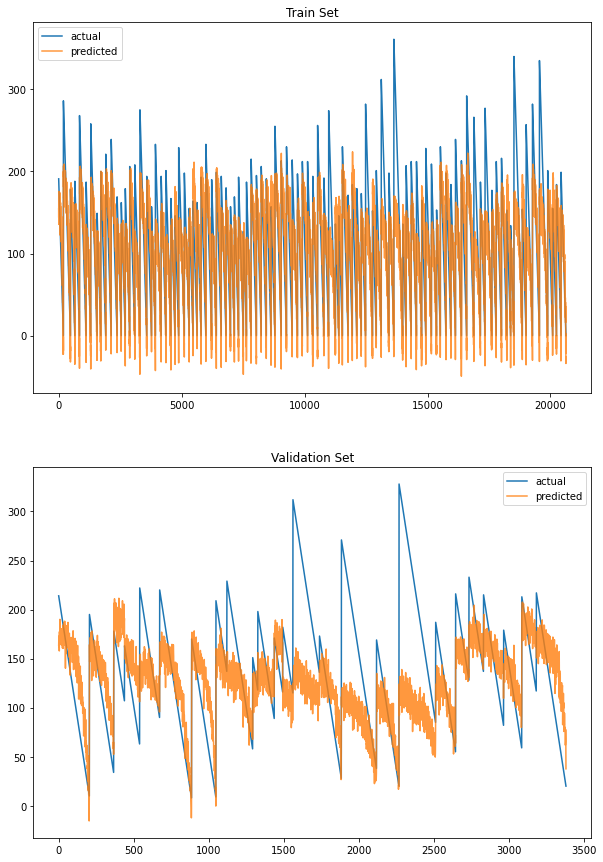

In [128]:
lr = LinearRegression()
mlmodel(lr)



# XGBoost

The RMSE for the train set:  34.267174030030965
The MAE for the train set:  25.039424050700635
The RMSE for the validation set:  57.493942134290805
The MAE for the validation set:  42.33888490021634
The values for hyperparameters were:   {'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


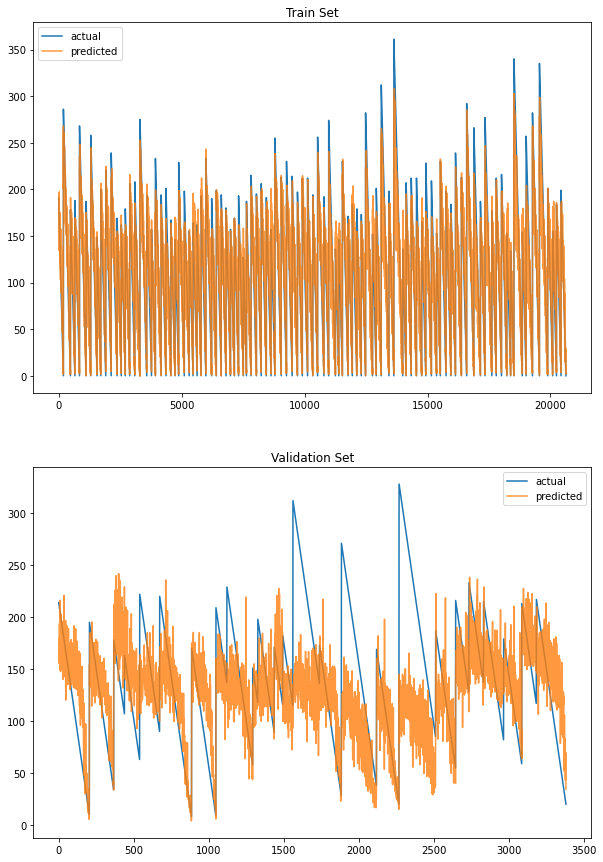

In [35]:
xg_reg = xgb.XGBRegressor()
mlmodel(xg_reg)

The RMSE for the train set:  44.360415546609396
The MAE for the train set:  32.82540305040184
The RMSE for the validation set:  56.131833693907716
The MAE for the validation set:  41.157925636730965
The values for hyperparameters were:   {'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.6, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.5, 'max_delta_step': 0, 'max_depth': 2, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


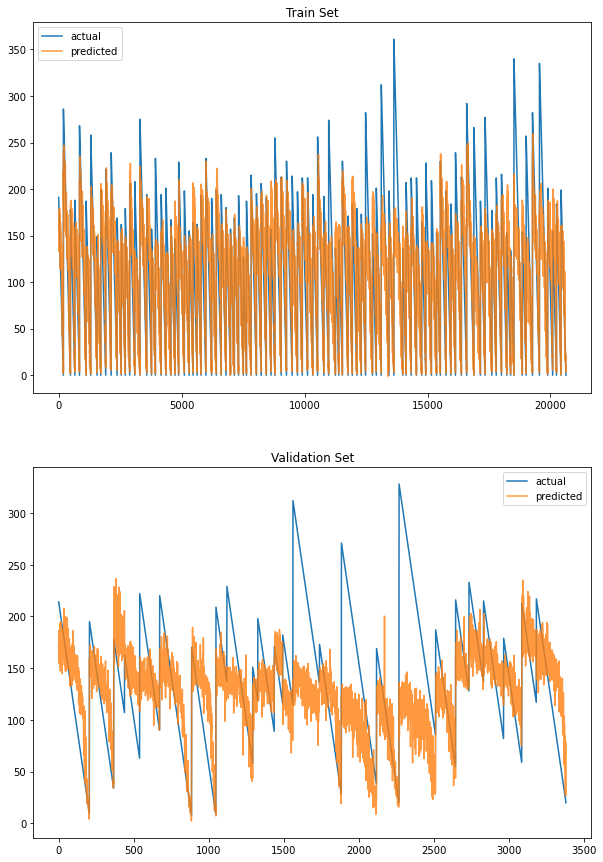

In [36]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.5, max_depth = 2, colsample_bytree = .6)
mlmodel(xg_reg)

# SVM

The RMSE for the train set:  46.06100529492261
The MAE for the train set:  33.30574164409061
The RMSE for the validation set:  58.05559660296572
The MAE for the validation set:  41.93196008865306
The values for hyperparameters were:   {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


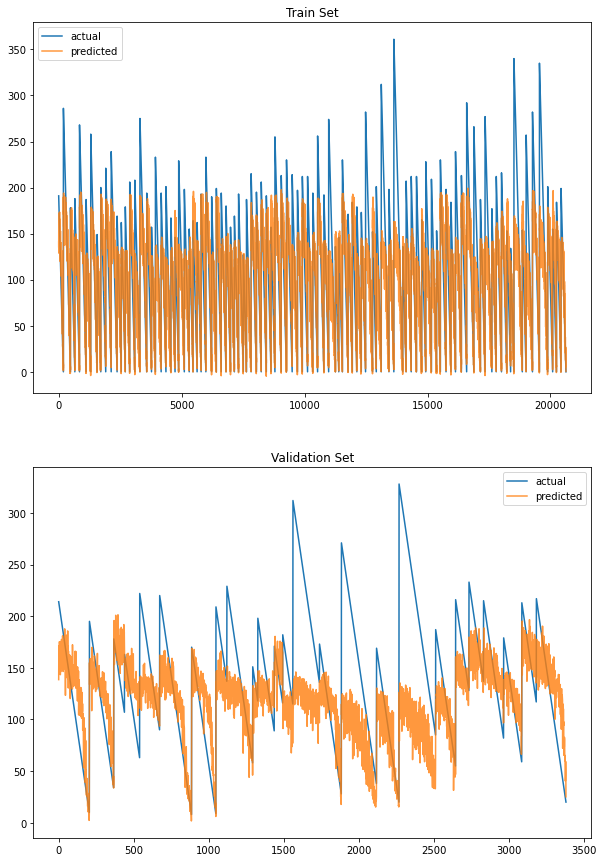

In [38]:
model = SVR()
mlmodel(model)

The RMSE for the train set:  51.89859060034718
The MAE for the train set:  39.678922546642625
The RMSE for the validation set:  62.084598722067305
The MAE for the validation set:  45.83018827479116
The values for hyperparameters were:   {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


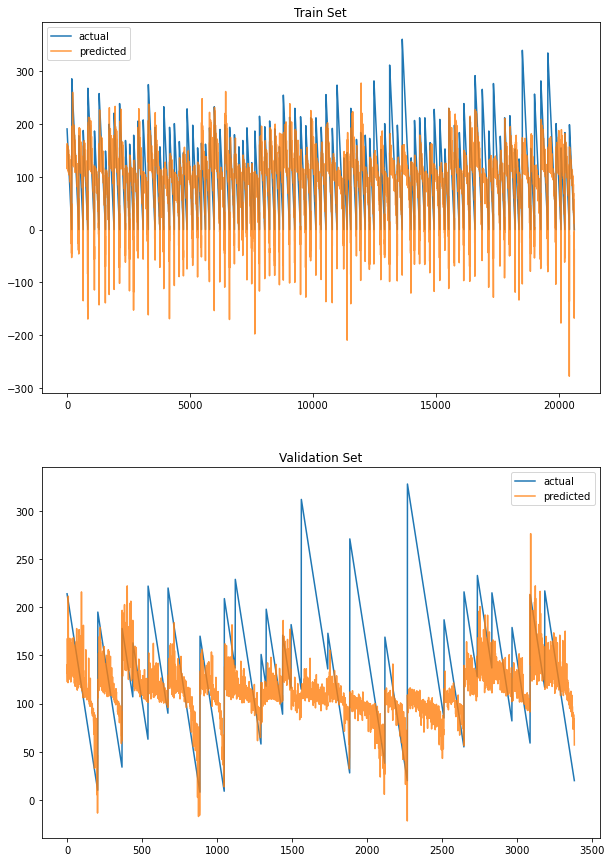

In [39]:
model = SVR(kernel = 'poly')
mlmodel(model)

The RMSE for the train set:  46.77045379565015
The MAE for the train set:  34.542682309703466
The RMSE for the validation set:  59.057889073662516
The MAE for the validation set:  42.26475777054559
The values for hyperparameters were:   {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


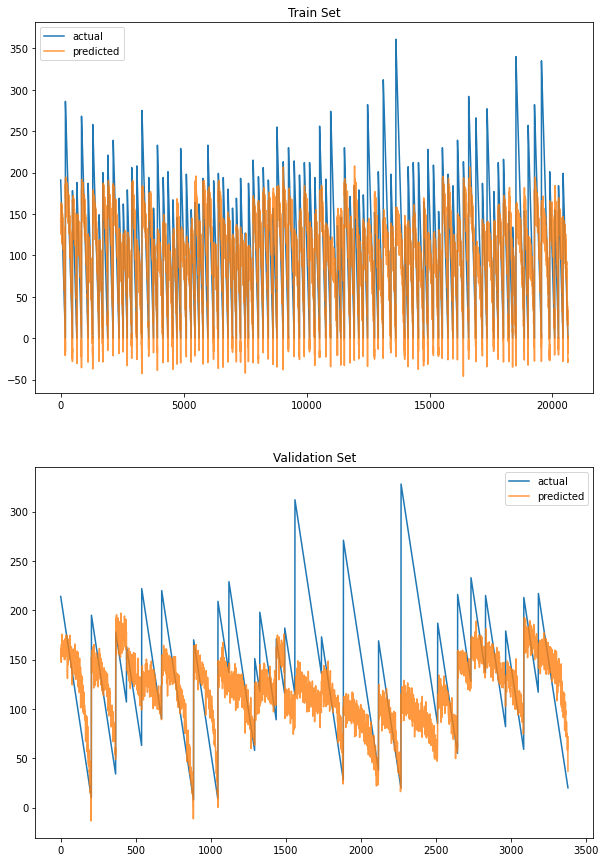

In [40]:
model = SVR(kernel = 'linear')
mlmodel(model)

The RMSE for the train set:  51.69840830847603
The MAE for the train set:  39.4834755689296
The RMSE for the validation set:  61.9361557366188
The MAE for the validation set:  45.63751500191344
The values for hyperparameters were:   {'C': 1.5, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.6, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


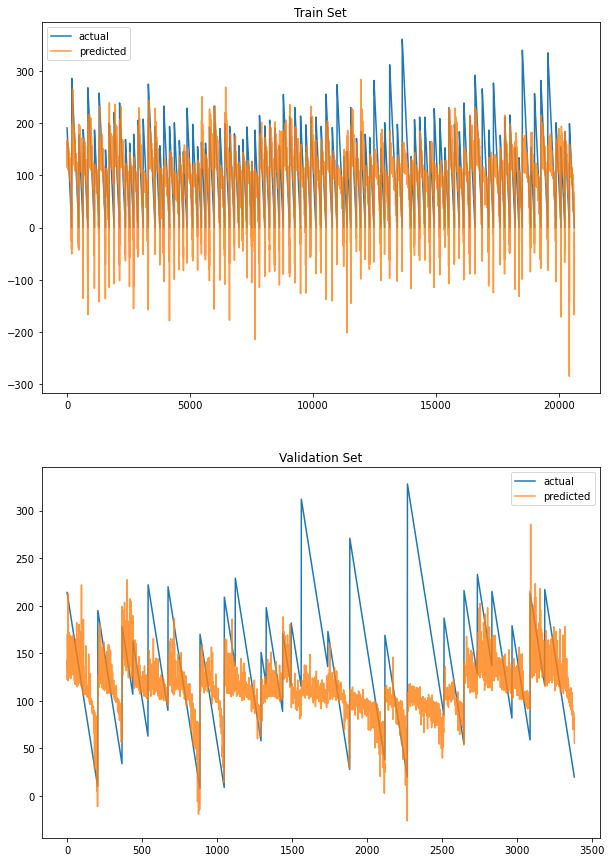

In [41]:
model = SVR(epsilon = .6, C = 1.5, degree = 3, kernel = 'poly')
mlmodel(model)

# Nearest Neighbors

The RMSE for the train set:  0.0
The MAE for the train set:  0.0
The RMSE for the validation set:  62.902069373364625
The MAE for the validation set:  47.26259411855517
The values for hyperparameters were:   {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


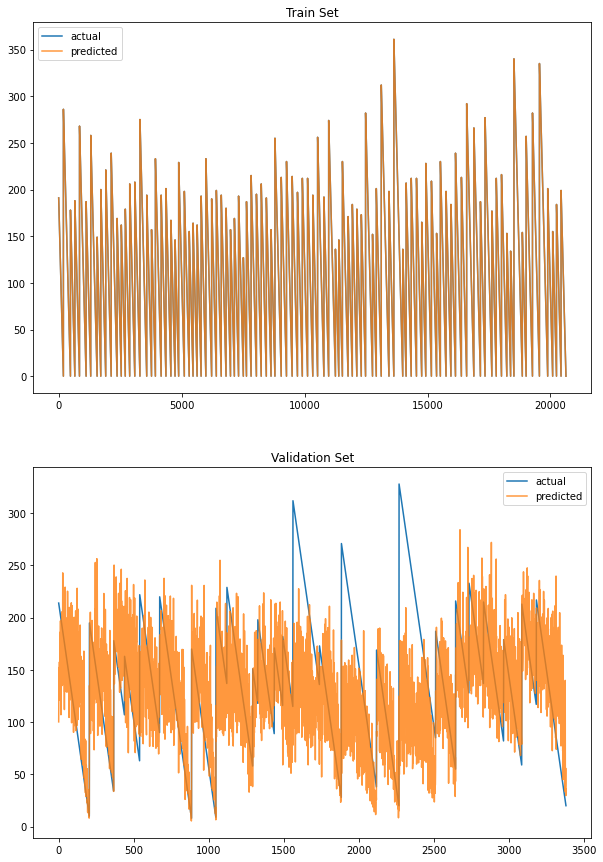

In [43]:
model = KNeighborsRegressor(n_neighbors = 3, weights = 'distance')
mlmodel(model)